# Chapter 16


# Machine Learning with OpenCV I


## Machine learning


- Supervised Machine Learning
  - Classification
    - Support Vector Machines
    - Nearest Neighbor
    - Neural Networks
  - Regression
    - Linear Regression
    - Devision Trees
    - Neural Networks
- Unsupervised Machine Learning
  - Clustering
    - K-Means
    - Hidden Markov Models
    - Neural Networks
- Semi-Supervised Machine Learning


### Generate Sample Data


dtype:  float32


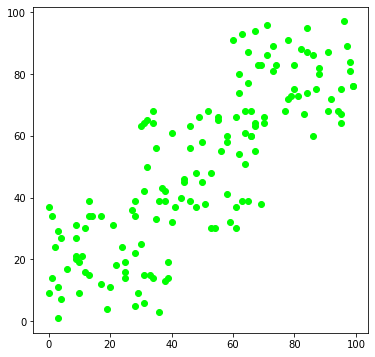

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def sampleData():

    data = np.float32(np.vstack((np.random.randint(0, 40, (50, 2)), np.random.randint(30, 70, (50, 2)),
    np.random.randint(60, 100, (50, 2))))) 

    return data


data = sampleData() 

print('dtype: ', data.dtype)

fig = plt.figure(figsize=(6, 6))
plt.scatter(data[:,0], data[:,1], c='lime')
plt.show()


## K-Means Clustering


`compactness, bestLabels, centers=cv.kmeans(data, K, bestLabels, criteria, attempts, flags[, centers])`

- `data`: input data for clustering (np.float32 dtype)
- `K`: desired number of clusters
- `bestLabels`: cluster labels
- `criteria`: maximum iterations and/or accuracy
  - `type`: type of termination criteria
    - cv2.TERM_CRITERIA_EPS: The algorithm stops when the specified accuracy, epsilon, is reached. - cv2.TERM_CRITERIA_MAX_ITER: The algorithm stops when the specified number of iterations, max_iterm, is reached. - cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER:
      The algorithm stops when any of the two conditions is reached.
  - `max_iter`: maximum iterations
  - `epsilion`: accuracy
- `attempts`: number of times the algorithm is executed using diffrent initial labelings
- `flags`: specifies how initial centers are selected
  - cv2.KMEANS_RANDOM_CENTERS flag selects random initial centers in each attempt.
  - cv2.KMEANS_PP_CENTERS flag uses the k-means++ center initialization proposed by Arthur and Vassilvitskii
- `bestLabels`: array of integers, stores the cluster indices
- `centers`: Array that contains the center for each cluster
- `compactness`: The sum of the squared distance from each point to their corresponding centers


`criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)`

- `max_iter`: 20
- `epsilion`: 1


compactness:  74388.23791992664
label:  (150, 1)
center:  (2, 2)


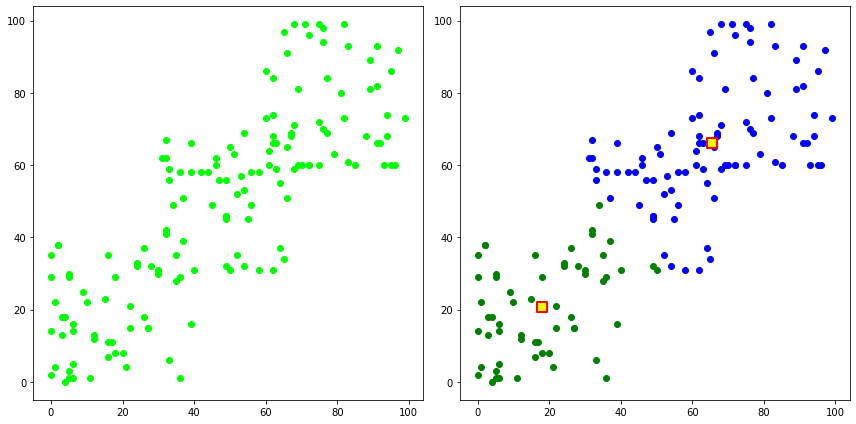

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# criteria 
max_iter = 20
epsilon = 1.0
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, max_iter, epsilon)

# cluster 
K = 2
compactness, label, center = cv.kmeans(data, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

print('compactness: ', compactness)
print('label: ', label.shape)
print('center: ', center.shape)

# make label single row
label_row = label.ravel()

# sort into group by using bool indexing
A = data[label_row == 0]
B = data[label_row == 1]


fig = plt.figure(figsize=(12, 6))

# plot original data
plt.subplot(121)
plt.scatter(data[:,0], data[:,1], c='lime')

# plot clustered data
plt.subplot(122)
plt.scatter(A[:,0], A[:,1], c='b')
plt.scatter(B[:,0], B[:,1], c='g')
plt.scatter(center[:,0], center[:,1], s=100, c='yellow', marker='s', edgecolors='red', linewidths=2)

plt.tight_layout()
plt.show()


compactness:  41163.01462364197
label:  (150, 1)
center:  (3, 2)


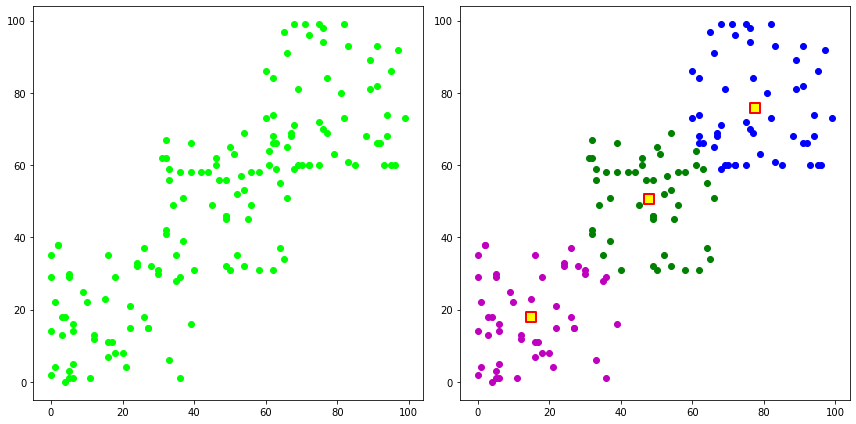

In [28]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


def colorQuantization(data,
                      # criteria
                      max_iter=20,
                      epsilon=1.0,
                      criteria=(cv.TERM_CRITERIA_EPS + \
                                cv.TERM_CRITERIA_MAX_ITER, max_iter, epsilon),
                      # cluster
                      K=3
                      ):

    compactness, label, center = cv.kmeans(
        data, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
print('label: ', label.shape)
print('center: ', center.shape)

# make label single row
label_row = label.ravel()

# sort into group by using bool indexing
A = data[label_row == 0]
B = data[label_row == 1]
C = data[label_row == 2]


fig = plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.scatter(data[:,0], data[:,1], c='lime')

# plot clustered data
plt.subplot(122)
plt.scatter(A[:,0], A[:,1], c='b')
plt.scatter(B[:,0], B[:,1], c='g')
plt.scatter(C[:,0], C[:,1], c='m')
plt.scatter(center[:,0], center[:,1], s=100, c='yellow', marker='s', edgecolors='red', linewidths=2)

plt.tight_layout()
plt.show()


## Class Activity

Cluster the data into four (4).


## K-Means Clustering for Color Quantization


compactness:  525453732.45666105
label:  (175508, 1)
center:  (3, 3)


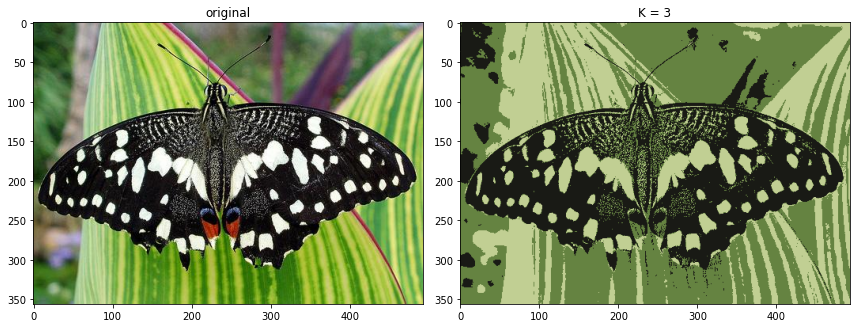

In [38]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

filename = '../samples/data/butterfly.jpg'

img = cv.imread(filename)


plt.figure(figsize=(12, 6))

# BGR to RGB
imgRGB = img[:, :, ::-1]
plt.subplot(1, 2, 1)
plt.imshow(imgRGB)
plt.title('original')

# img to data (2 D)
data = np.float32(img).reshape((-1, 3))

# criteria
max_iter = 20
epsilon = 1.0
criteria = (cv.TERM_CRITERIA_EPS +
            cv.TERM_CRITERIA_MAX_ITER, max_iter, epsilon)

# cluster
K = 3
compactness, label, center = cv.kmeans(
    data, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

print('compactness: ', compactness)
print('label: ', label.shape)
print('center: ', center.shape)

# img to k center colors
# convert center float32 to uint8
center = np.uint8(center)

# replace pixel values with their center value
imgNew = center[label.flatten()]
imgNew = imgNew.reshape(img.shape)


# BGR to RGB
imgRGB = imgNew[:, :, ::-1]
plt.subplot(1, 2, 2)
plt.imshow(imgRGB)
plt.title(f'K = {K}')

plt.tight_layout()
plt.show()


Extracting functions and making code compact


In [94]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import collections


def fromBRGtoRGB(img):
    # BGR to RGB
    return img[:, :, ::-1]


def colorQuantization(data, shape,
                      # criteria
                      max_iter=20,
                      epsilon=1.0,
                      criteria=(cv.TERM_CRITERIA_EPS + \
                                cv.TERM_CRITERIA_MAX_ITER, max_iter, epsilon),
                      # cluster
                      K=3
                      ):

    compactness, label, center = cv.kmeans(
        data, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

    print('compactness: ', compactness)
    print('label: ', label.shape)
    print('center: ', center.shape)

    # img to k center colors
    # convert center float32 to uint8
    center = np.uint8(center)

    # replace pixel values with their center value
    imgNew = center[label.flatten()]
    imgNew = imgNew.reshape(shape)

    # color distribution
    legendWidth = imgNew.shape[1]
    legendHeight = 70
    # white background image
    imgColorLegend = np.ones(
        (legendHeight, legendWidth, 3), dtype='uint8') * 255

    # 
    total = imgNew.shape[0] * imgNew.shape[1]
    counter = collections.Counter(label.flatten())
    start = 0
    for key, value in counter.items():
        colorWidth = value * legendWidth // total
        # draw rectangle
        end = start + colorWidth
        ptTopLeft = (start, 0)
        ptBottomRight = (end, 50)
        color = center[key].tolist()
        cv.rectangle(imgColorLegend, ptTopLeft, ptBottomRight, color, -1)
        start = end

    # stack legend and image
    imgNew = np.vstack((imgColorLegend, imgNew))

    return imgNew, compactness, label, center


def plotImage(img, subplotValue, title):
    imgRGB = fromBRGtoRGB(img)
    plt.subplot(subplotValue)
    plt.imshow(imgRGB)
    plt.title(title)


compactness:  525286245.8945273
label:  (175508, 1)
center:  (3, 3)
compactness:  271382406.5850241
label:  (175508, 1)
center:  (5, 3)
compactness:  126771446.63812354
label:  (175508, 1)
center:  (10, 3)
compactness:  66684514.05274561
label:  (175508, 1)
center:  (20, 3)
compactness:  39391250.05860902
label:  (175508, 1)
center:  (40, 3)


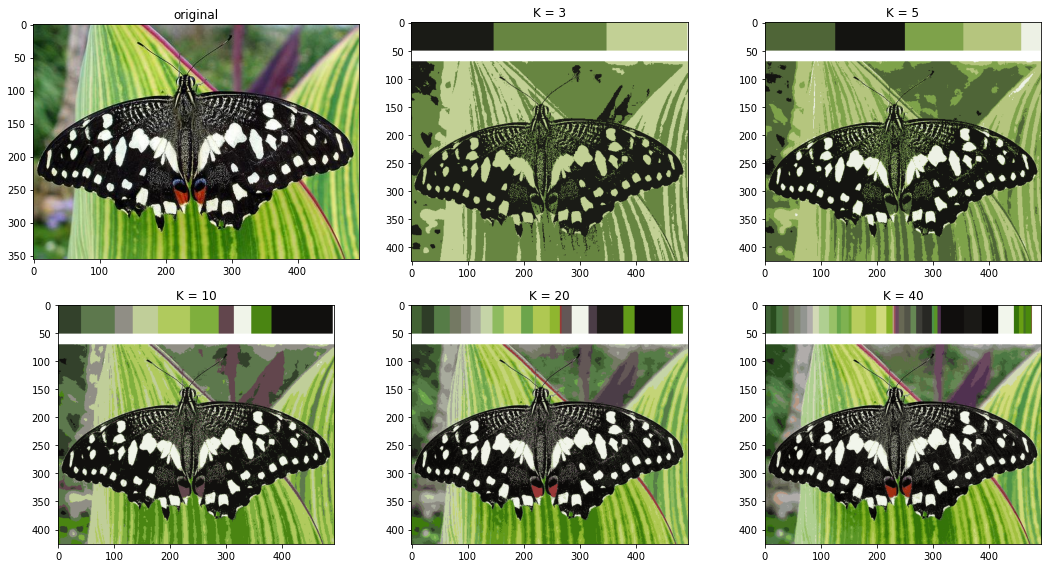

In [95]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

filename = '../samples/data/butterfly.jpg'

img = cv.imread(filename)


plt.figure(figsize=(15, 8))

# plot img
plotImage(img, 231, 'original')

# img to data (2 D)
data = np.float32(img).reshape((-1, 3))

max_iter = 20
epsilon = 1.0
criteria = (cv.TERM_CRITERIA_EPS +
            cv.TERM_CRITERIA_MAX_ITER, max_iter, epsilon)

# K = 3
imgNew, compactness, label, center = colorQuantization(data, img.shape)
# plot imgNew with K=3
plotImage(imgNew, 232, 'K = 3')

# K = 5
K = 5
imgNew, compactness, label, center = colorQuantization(data, img.shape, max_iter=20, epsilon=1.0,
                                                       criteria=(cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, max_iter, epsilon), K=K)
# plot imgNew
plotImage(imgNew, 233, f'K = {K}')


# K
K = 10
imgNew, compactness, label, center = colorQuantization(data, img.shape, K=K)
# plot imgNew
plotImage(imgNew, 234, f'K = {K}')

# K
K = 20
imgNew, compactness, label, center = colorQuantization(data, img.shape, K=K)
# plot imgNew
plotImage(imgNew, 235, f'K = {K}')

# K
K = 40
imgNew, compactness, label, center = colorQuantization(data, img.shape, K=K)
# plot imgNew
plotImage(imgNew, 236, f'K = {K}')

plt.tight_layout()
plt.show()


## k-nearest neighbor

![alt](assets/knearest.png)

In the above image the green circle is classified as triangle when k = 3 and square when k = 5.

`retval, results, neighborResponses, dist=cv2.ml_KNearest.findNearest(samples, k[, results[, neighborResponses[, dist]]])`

result: [[1.]]
neighbours: [[1. 0. 1.]]
distance: [[205. 324. 425.]]


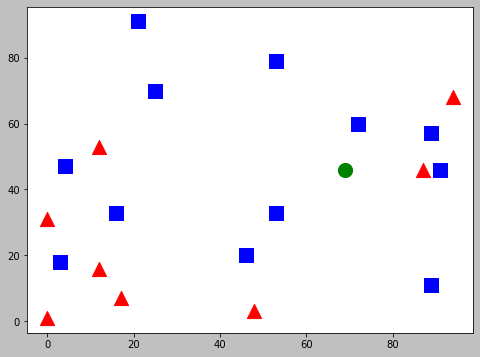

In [109]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt

# 
data = np.random.randint(0, 100, (20, 2)).astype(np.float32)
# We create the labels (0: red, 1: blue) for each of the 16 points:
labels = np.random.randint(0, 2, (20, 1)).astype(np.float32)
# Create the sample point to be classified:
sample = np.random.randint(0, 100, (1, 2)).astype(np.float32)

# k-NN creation:
knn = cv.ml.KNearest_create()
# k-NN training:
knn.train(data, cv.ml.ROW_SAMPLE, labels)
# k-NN find nearest:
k = 3
ret, results, neighbours, dist = knn.findNearest(sample, k)

# Plot all the data and print the results:
# Create the dimensions of the figure:
fig = plt.figure(figsize=(8, 6))
fig.patch.set_facecolor('silver')
# Take points with label 0 (will be the red triangles) and plot them:
red_triangles = data[labels.ravel() == 0]
plt.scatter(red_triangles[:, 0], red_triangles[:, 1], 200, 'r', '^')

# Take points with label 1 (will be the blue squares) and plot them:
blue_squares = data[labels.ravel() == 1]
plt.scatter(blue_squares[:, 0], blue_squares[:, 1], 200, 'b', 's')

# Plot the sample point:
plt.scatter(sample[:, 0], sample[:, 1], 200, 'g', 'o')


# Print results:
print("result: {}".format(results))
print("neighbours: {}".format(neighbours))
print("distance: {}".format(dist))

In [42]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

filename = '../samples/data/digits.png'
imgGray = cv.imread(filename, cv.IMREAD_GRAYSCALE)

print(imgGray.shape)

#### get all the digits
IMG_SIZE = 20

rowNum = imgGray.shape[0] / IMG_SIZE
colNum = imgGray.shape[1] / IMG_SIZE

rows = np.vsplit(imgGray, rowNum)

digits = []
for row in rows:
    rowCells = np.hsplit(row, colNum)
    for digit in rowCells:
        digits.append(digit)

# convert list to np.array
digits = np.array(digits)
print('digits', digits.shape)

# labels
DIGITS_CLASS = 10
repeatNum = len(digits) / DIGITS_CLASS
labels = np.repeat(np.arange(DIGITS_CLASS), repeatNum)
print('labels', labels.shape)

#### get features
features = []
for digit in digits:
    img_pixel = np.float32(digit.flatten())
    features.append(img_pixel)

features = np.squeeze(features)
print('features', features.shape)

# shuffle features and labels
# seed random for constant random value
rand = np.random.RandomState(321)
shuffle = rand.permutation(features.shape[0])
features, labels = features[shuffle], labels[shuffle]

# split into training and testing 
splitRatio = [1, 1]
sumRatio = sum(splitRatio)
partition = np.array(splitRatio) * len(features) // sumRatio
partition = np.cumsum(partition)

featureTrain, featureTest = np.array_split(features, partition[:-1])
labelTrain, labelTest = np.array_split(labels, partition[:-1])

print('featureTrain', featureTrain.shape)
print('featureTest', featureTrain.shape)
print('labelTrain', labelTrain.shape)
print('labelTest', labelTest.shape)

# Train the KNN model:
print('Training KNN model')
knn = cv.ml.KNearest_create()
knn.train(featureTrain, cv.ml.ROW_SAMPLE, labelTrain)

# Test the created model:
k = 5
ret, prediction, neighbours, dist = knn.findNearest(featureTest, k)

# Compute the accuracy:
accuracy = (np.squeeze(prediction) == labelTest).mean() * 100
print("Accuracy: {}".format(accuracy))



(1000, 2000)
digits (5000, 20, 20)
labels (5000,)
features (5000, 400)
featureTrain (2500, 400)
featureTest (2500, 400)
labelTrain (2500,)
labelTest (2500,)
Training KNN model
Accuracy: 92.08


## Class Activity
Find the accuracy in a `for` loop for k = 1 to 10 

In [37]:
x = np.arange(10)
print(x)

rand = np.random.RandomState(1)
rand.permutation(x)

[0 1 2 3 4 5 6 7 8 9]


array([2, 9, 6, 4, 0, 3, 1, 7, 8, 5])

## Statistics
